# **Распознавание рукописных цифр с помощью сверточной нейронной сети в библиотеке Keras**

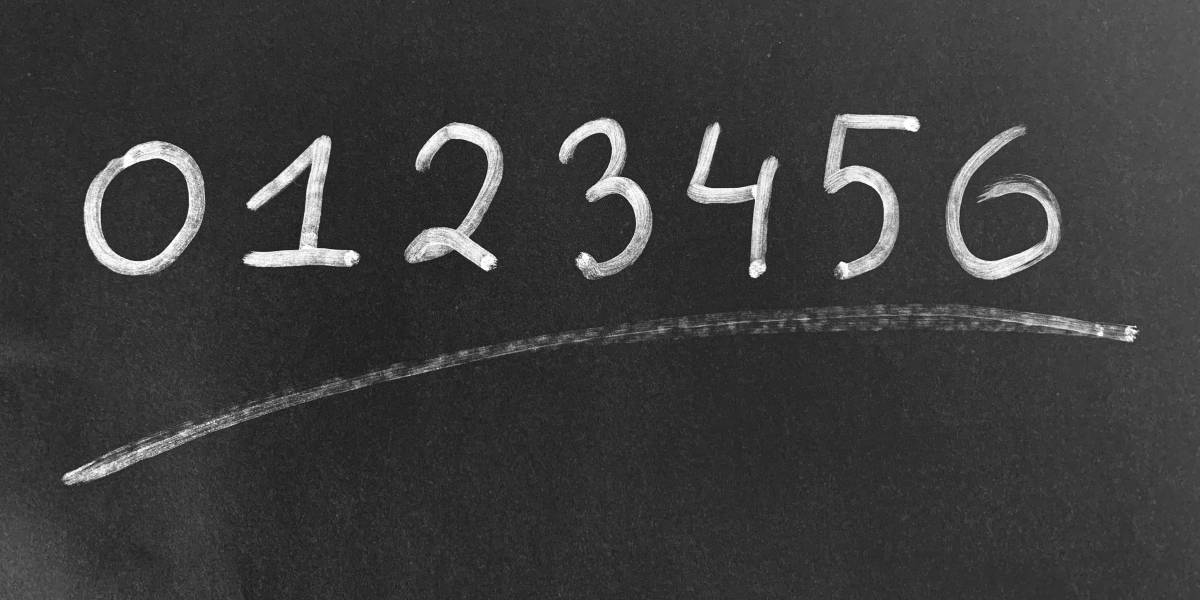

# **Импорт библиотек**
Numpy - работа с векторами
Pandas - работа с датасетами
matplotlib - графики 
TensorFlow - нейронные сети
train_test_split - разделение на тренировочную и валидационную выборку

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Импорт данных
Импорт данных для тренировки и теста для соревнований

In [4]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [5]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Подготовка данных для обучения

**Деление данных на фичи и цель**

In [7]:
y = df_train['label']
X = df_train.drop(columns=['label'])

In [8]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Деление на тренировочные и тестовые данные**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Перевод данных в векторы numpy, чтобы произвести изменение по форме 28,28 вместо 784**

In [10]:
X_train = X_train.to_numpy() 
X_test = X_test.to_numpy() 
df_test = df_test.to_numpy()

In [11]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [12]:
display(X_train.shape)
display(X_test.shape)
display(df_test.shape)

(28140, 784)

(13860, 784)

(28000, 784)

In [13]:
X_train = X_train.reshape(28140, 28, 28, 1)
X_test = X_test.reshape(13860, 28, 28, 1)
df_test = df_test.reshape(28000, 28, 28, 1)

**Картинки цифр, которые будет распознавать нейросеть**

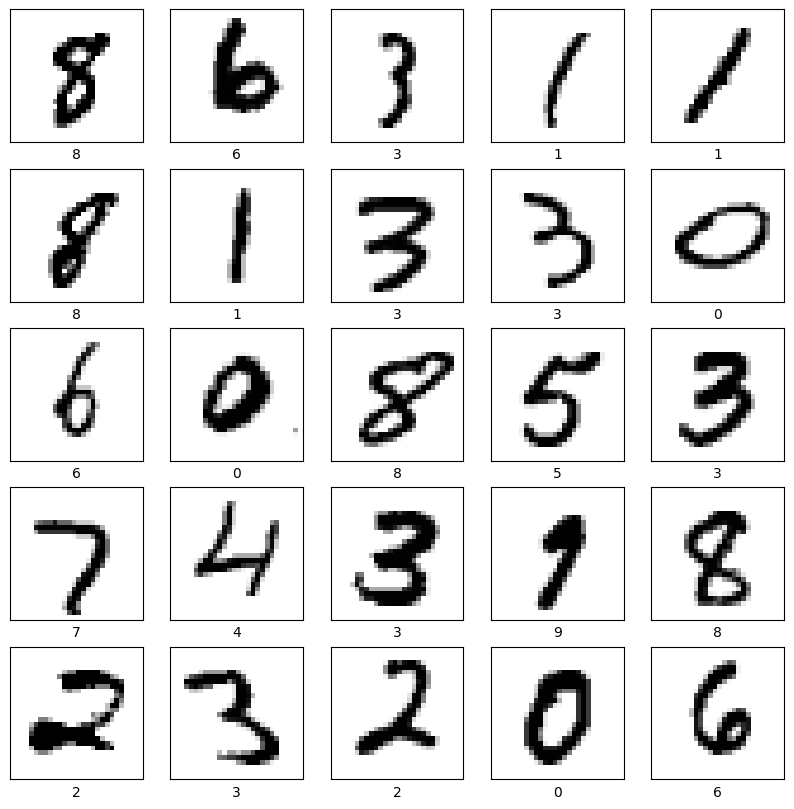

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Нормализация данных: перевод от 0 до 255 в значения между 0 и 1**

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

df_test = df_test / 255.0

# Построение сверточной нейросети
**Используем слои Conv1D, MaxPooling1D для построение сверточной нейронной сети, после переводим данные в формат вектора, на котором будет обучаться классическая нейронная сеть**

In [16]:
model = models.Sequential([
    
    layers.BatchNormalization(input_shape=(28, 28)),
    layers.Conv1D(128, 8, activation='relu', padding = 'valid'),
    layers.MaxPooling1D(),
    
    layers.Flatten(),

    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.8),
    
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.6),
    
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])

**Используем один из самых популярных методов оптимизации, функция потерь Категориальная кросс энтропия, тк мы имеем множество 10 категорий, метрикой будет точность**

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**Чтобы нейросеть не переобучалась введем раннюю остановку и сокращение learning rate, чтобы добиться максимальной точности**

In [18]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=512,
    callbacks=[earlyStopping, reduce_lr_loss]
)

Epoch 1/1000
55/55 [==============================] - 8s 89ms/step - loss: 1.6558 - accuracy: 0.4537 - val_loss: 1.1969 - val_accuracy: 0.8201 - lr: 0.0010
Epoch 2/1000
55/55 [==============================] - 4s 81ms/step - loss: 0.7907 - accuracy: 0.7623 - val_loss: 0.5189 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 3/1000
55/55 [==============================] - 5s 83ms/step - loss: 0.5109 - accuracy: 0.8551 - val_loss: 0.3257 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 4/1000
55/55 [==============================] - 5s 88ms/step - loss: 0.3677 - accuracy: 0.8971 - val_loss: 0.2533 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 5/1000
55/55 [==============================] - 4s 80ms/step - loss: 0.2790 - accuracy: 0.9244 - val_loss: 0.1979 - val_accuracy: 0.9398 - lr: 0.0010
Epoch 6/1000
55/55 [==============================] - 4s 79ms/step - loss: 0.2180 - accuracy: 0.9429 - val_loss: 0.1649 - val_accuracy: 0.9509 - lr: 0.0010
Epoch 7/1000
55/55 [==============================] - 5s 83ms/st

**Summary модели**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28)            112       
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 21, 128)           28800     
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                        

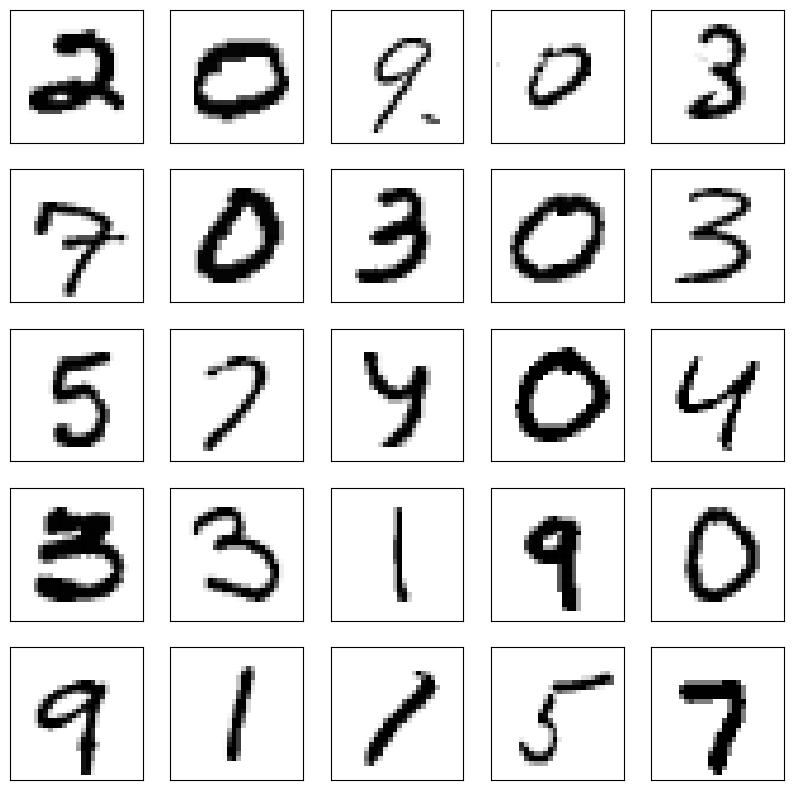

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df_test[i], cmap=plt.cm.binary)
plt.show()

**Предсказание модели на тестовых данных**

In [21]:
df_test_pred = model.predict(df_test)

875/875 [==============================] - 4s 4ms/step


In [22]:
answer = pd.DataFrame([np.argmax(i) for i in df_test_pred], columns=['Label'])
answer = answer.reset_index().rename(columns={'index': "ImageId"})
answer['ImageId'] = answer['ImageId'] + 1

# Submission

In [23]:
answer

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
answer.to_csv('submission.csv', index=False)